## **DIABETES CLASSIFICATION**


## **1. Import Library**

In [7]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns 
import scipy as sp
import matplotlib.pyplot as plt


## **2. Import Datafile**

In [9]:
# pada sel ini adalah tahapan import dataset dan menampilkan 
df= pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **3. Analisis Dataset**

In [ ]:
# Mengetahui informasi tentang jumlah baris data, kolom dan type data yang digunakan pada setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# Mengecek apakah ada missing value(data yang kosong)
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Menentukan kolom mana yang menjadi feature dan mana yang menjadi target. Disini target kita adalah kolom Outcome. 

In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# **4. Data Clening**

Karena tidak ada data yang missing value, maka kita lanjut ke step berikutnya.

### **5. Menencoding data kategori menjadi numerik**
Tetatpi karna data pada outcome sudah numerik maka hal ini tidak diperlukan.Maka kita lanjut ke step berikutnya.

## **6. Visualisasi Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


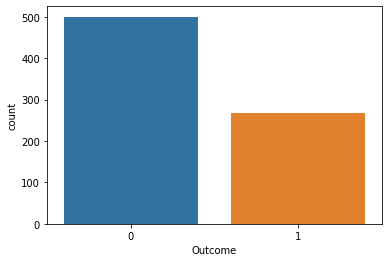

In [ ]:
# Visualisasi data kolom diagnosis menggunakan library seaborn 
sns.countplot(df['Outcome'], label="count")

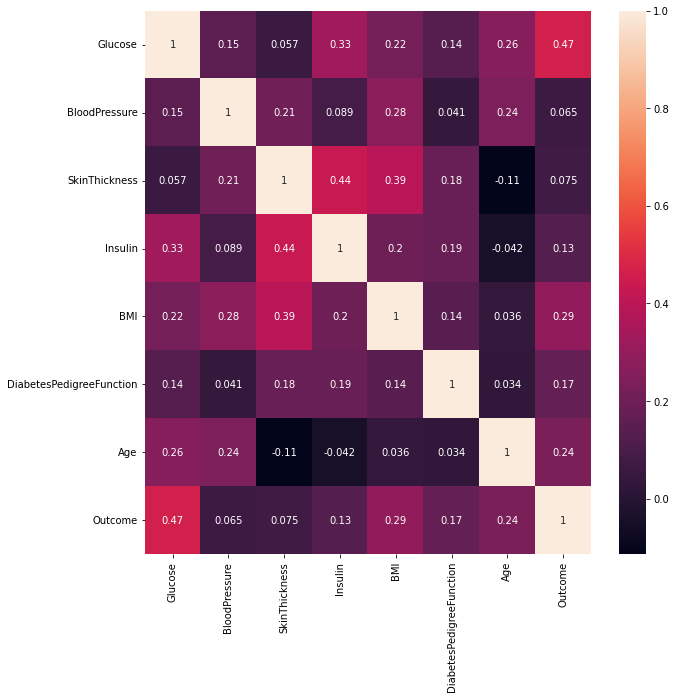

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:10].corr(), annot=True)

## **7. Training Data Dan Test Data**

In [12]:
# Menghapus kolom Outcome dan menjadikan kolom diagnosis sebagai target dari machine learning
x = df.drop(['Outcome'], axis=1)
y=df['Outcome']

In [13]:
# Train test split
# x_train untuk menampung data latihan,
# x_test untuk menampung data test 
# y_train untuk menampung target latihan
# y_test untuk menampung target test
# maksud dari test_size= 0.2 yaitu data yang digunakan untuk test sebesar 0.2 atau 20%
# train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3)


In [14]:
# Scalling 
# Imoport StandardScaler untuk melakukan normalisasi data
from sklearn.preprocessing import StandardScaler

model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)

In [17]:
def models(x_train, y_train):

  #1 Logitic Regression 
  from sklearn.linear_model import LogisticRegression
  logistic = LogisticRegression()
  logistic.fit(x_train, y_train)

  #2 DecisionTreeClassifier
  from sklearn.tree import DecisionTreeClassifier
  tree= DecisionTreeClassifier(random_state=0, criterion = 'entropy')
  tree.fit(x_train, y_train)   

  #3 SVC
  from sklearn.svm import SVC
  svc = SVC(random_state=0)
  svc.fit(x_train, y_train)

  #4 Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier()
  forest.fit(x_train, y_train)

   #4 KNeighbors Classifier
  from sklearn.neighbors import KNeighborsClassifier 
  neighbors = KNeighborsClassifier()
  neighbors.fit(x_train, y_train)


  print('Logistic Regression :', logistic.score(x_train, y_train))
  print('Decision Tree :', tree.score(x_train, y_train))
  print('SVC:', svc.score(x_train, y_train))
  print('Random Forest:', forest.score(x_train, y_train))
  print('KNeighbors Accuracy:', neighbors.score(x_train, y_train))
  # print('KNeighbors Accuracy:', neighbors.score(X_train, y_train))
 
  return logistic,tree,svc,forest,neighbors


In [18]:
model = models(x_train, y_train)

Logistic Regression : 0.7821229050279329
Decision Tree : 1.0
SVC: 0.8379888268156425
Random Forest: 1.0
KNeighbors Accuracy: 0.8361266294227188


In [ ]:
from sklearn.metrics import classification_report

for i in range(len(model)):
  print('Model', i)
  print(classification_report(y_test, model[i].predict(x_test)))
 


Model 0
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       155
           1       0.72      0.61      0.66        76

    accuracy                           0.79       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.79      0.79      0.79       231

Model 1
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       155
           1       0.47      0.53      0.50        76

    accuracy                           0.65       231
   macro avg       0.61      0.62      0.61       231
weighted avg       0.66      0.65      0.65       231

Model 2
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       155
           1       0.69      0.58      0.63        76

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.77      0.77       